# Racap

## Topics
* Dictionary 
* Functions (no `lambdas`)
* Files Reading & Writing
* Exceptions *(creeeps in everywhere)*
* Classes & Objects *(creeeps in everywhere)*
* OOP *(creeeps in everywhere)*
---

## Dictionary

**What do we know about it's properties?**
* it has something like a `key` and a `value` but how are they related? The `key` acts like an index or an identifier to a `value`.
 * we **have** to use immutable (cannot change once created) datatypes (aka `string`, `integer`, `frozenset`, `float`, etc) to define the `key`s.
 * `key`s must be unique!
 * the `value`s part can be **any datatype**.
* because the `value` can be of any datatype, we can do things like nested dictionaries or nested, nested horrible datatypes!
* because the `key`s acts like an *index*, we can use the square brackets (`[]`) to directly access the `value` for the given `key`
* it is dynamic, aka it can grow and shrink whenever.
* in **Python 3.7 onwards**, Dictionary order is guaranteed to be insertion order.
* **it's always False when empty**

General Syntax
```python
d = {'key_1': 'value_1', ..., 'key_n': 'value_n'}
```

**Interesting note:** Python dictionaries and the JSON data format are like a happily married couple! They work together extremely well!

**What do we know about creating an manipulating it?**
* direct ways to create an empty dictionary are: `dict()`, `{}`
* indirect ways are

In [ ]:
# method 1
d={'Name': 'John', 'MatrNo': '002558', 'Profession': 'Student'}
d

In [ ]:
# method 2 - using the dict() function
d=dict(Name = 'John', 
       MatrNo = '002558', 
       Profession = 'Student')
d

In [ ]:
# method 3 - most widely used
state = {}
state['mWakefulness'] = 'Awake'
state['mHoldingWakeLockSuspendBlocker'] = 'true'

state

In [ ]:
# method 4a - combining lists 
value_lst = ['blue', 'red', 'black', 'white', 'purple']
e = {}
for key, value in enumerate(value_lst):
    e[key] = value
e

In [ ]:
# method 4b - combining lists 
value_lst = ['blue', 'red', 'black', 'white', 'purple']
e = {}
for idx in range(len(value_lst)):
    e[idx] = value_lst[idx]
e

In [ ]:
# method 4c - combining lists and tuples
key_lst = ['a', 'b', 'c', 'd', 'e']
value_lst = ['blue', 'red', 'black', 'white', 'purple']
e = {}
for tu in zip(key_lst, value_lst):
    e[tu[0]] = tu[1]
e

### Dictionary Functions
* Generally we don't really want to access a dictionary value manaually, aka `d[1]` because it is error prone. What happens if the `key` is not there?
* We like to use the dictionary functions and operators to check first then extract the values. Which are the "more" heavily used functions and operators?
 * **`in` operator** - checks if the `key` is in the dictionary. If yes, returns `True`. If no, returns `False`.
 * **`len()`** - always good to find out the length of the dictionary so that it can help us decided which is the best method we can use to work with that particular dictionary
 * **`list()`** - on a dictionary, this returns all the dictionary `keys` in a `list` format
 * **`get()`** - gets the value based on the given key, can set a default value to return should the key be not found.
 * **`keys()` & `values()`** - returns either the key or value. **Note** that the returned tuples cannot be used directly, need to convert them to like a `list` to use them
 * **`items()`** - returns the key & value as pairs. **Note** that the returned tuples cannot be used directly, need to convert them to like a `list` to use them
 * **`update()`** - sort of like merging 2 dictionaries but any duplicated keys, the 2nd dictionary `key` will always win.
 * **`clear()`** - removes all dictionary keys & values

In [ ]:
# converting the returned values from items() into a list because we can't use them directly
# this applies for keys() and values() functions
list(e.items())

---
## Functions

**What do we know about function properties?**
* it begans with a `def` keyword.
* it is used to perform a single repeatable task.
* it has a name.
* it can accept inputs and return some output after completing its task.
* docstring is what the industry use to document what the function does.

**What does a function look like?**
```python
def function_name( parameters ):
    "function_docstring or documentation"
    # task for the function to do
    return [expression] # outputs
```

**Ways of passing input to a function**
* **Positional Arguments** - characterized by the 1 to 1 mapping of input arguments to input parameters. Order for both input arguments and input parameters for function caller and function definition (respectively) is very important.

* **Keyword Arguments** - characterized by ability of the input arguments to pass values to the function in a `keyword`=`value` format. Order of the input arguments for the function caller is not unimportant.

* **Default Parameters** - characterized by the input parameters of the function definition having the `keyword`=`value` format. Not only is order of the input arguments unimportant for the function caller, the function caller does not even need to supply all the input arguments to call the function. 

In the industry, a mixed of all 3 ways of passing input to a function is used.

#### A word of caution 
**NEVER EVER** use mutable objects for default values when setting up default parameters for input parameters because the mutable object created in the function definition will never be "replaced" with a new object.

**Example of why**

In [ ]:
class A:
    def __init__(self, name, var=list()):
        self.inst_name = name
        self.var1 = var
        print(f'{self.inst_name} in __init__: {self.var1}')
    
    def add_to(self,var2):
        self.var1.append(var2)
        print(f'{self.inst_name} in add_to: {self.var1}')
    
n = A('n')
n.add_to([5])
print()
b = A('b')
b.add_to([1,2])

**`NoneType` and how it is used** <br>
Generally used as default values with functions with default parameters in their input parameter list and/or as a default return value of all Python functions.

The solution to the above problem is to use `None`.

In [ ]:
class A:
    def __init__(self, name, var=None):
        self.inst_name = name
        self.var1 = []
        print(f'{self.inst_name} in __init__: {self.var1}')
    
    def add_to(self,var2):
        self.var1.append(var2)
        print(f'{self.inst_name} in add_to: {self.var1}')
    
n = A('n')
n.add_to([5])
print()
b = A('b')
b.add_to([1,2])

When do we generally encounter such functions with a lot of `NoneType` objects being used in its default values? One example is where a function is used for setting up "an environment" before a call to another function to do the task.

**Example: A background job scheduler**

In [ ]:
'''
These set of functions belong to a class that sets up a scheduler to constantly get data
from a sensor every x amount of time
'''
def setupScheduler(self, ioPorts, scheJobID=None, now=False):
    '''
    ioPorts - list of indexes of the currently in use sensor ports
    now - whether or not to pause the job after creating it
    '''
    if scheJobID is None:
        scheJobID = self.get_next_job_id()
        
    if constants.sche.get_job(scheJobID) is None:
        # self.getSensorData() is a callback
        constants.sche.add_job(id="sensorTask", func=getSensorData, args=ioPorts,
                            trigger='interval', seconds=0.3)
        if not now:
            constants.sche.pause_job(scheJobID)
    
    return scheJobID

def resumeTask(self, scheJobID):
    constants.sche.resume_job(scheJobID)

def removeTask(self, scheJobID):
    constants.sche.remove_job(scheJobID)

**Return values**

Python allows functions to return a single value or multiple values. Multiple values are always separated via a comma (`,`). But **there's a catch**, when assigning return values from a function that returns multiple values, it will always **return in a tuple format**.

**Example: Function returning multiple values**

In [ ]:
def return_multiple():
    return 1,3,4

print(return_multiple())

Before learning about `tuple`, we can use a technique called "Unpacking" to unpack the return values into individual variables for use.

**Example: Unpacking returned values**

In [ ]:
def return_multiple():
    return 1,3,4

var1, var2, var3 = return_multiple()

print(f'{var1}, {var2}, {var3}')

---
## File Reading & Writing

Before we can even read or write a file we first have to find it! That where file paths comes in.

**2 types of Paths:**
* **Absolute Path** - this refers to the **complete path details** to the location of the file or folder.
 eg: `C:/Program Files (x86)/Mozilla Firefox/firefox.exe`
* **Relative Path** - this refers to the a specific location of the file or folder **relative to** the current working directory. 
 eg: `../Start Menu/Programs/Google Chrome.lnk`
 
**2 Path building libraries:**
* **`os.path`** - available in Python 2 and 3
* **`pathlib`** - available from Python 3.4 onwards. Use this if your program has no access to operating system operations.

**How are file paths determined from where your current script is running from (using the `pathlib` library)?**
1. getting the current working directory.
2. if you need go **up 1 level** from the current working directory, use `parent` attribute.
3. if you need to go **into a folder** from either the current working directory or another directory, join the folder name to the current path.

In [1]:
from pathlib import Path

# getting current working directory
curr_work_dir = Path().cwd()
print(f'Current working directory: {curr_work_dir}\n')

# moving 1 directory up from current working directory
one_up = curr_work_dir.parent
print(f'Up 1 level from current working directory: {one_up}\n')

# entering a directory from the previous level
change_dir = one_up.joinpath('Handouts')
print(f'Entering a folder from the previous directory: {change_dir}\n')

Current working directory: D:\OneDrive - Nanyang Technological University\DIGIPEN_TFIP_IBF_LESSONS\Week 7 - Days 1,2

Up 1 level from current working directory: D:\OneDrive - Nanyang Technological University\DIGIPEN_TFIP_IBF_LESSONS

Entering a folder from the previous directory: D:\OneDrive - Nanyang Technological University\DIGIPEN_TFIP_IBF_LESSONS\Handouts



Now that you have the path settled, we need to check if the path is a currently existing location before we can do the either of the following tasks:
* query for all the files and folders in that directory
* access (read or write) a particular file
* enter another directory within this directory

In [2]:
# listing all files and folders in the directory
if change_dir.exists():
    for item in change_dir.iterdir():
        print(item)

Let's say that we have found the file that we want to access. We have 2 options: read the file or write to the file.<br>
Both of these reading from and writing to a file requires us to provide a certain file access mode.

| Character | Meaning |
|:---|:---|
| `r` | Open for reading. **(default)** |
| `w` | Open for writing, overwriting all previous data in the file. Creates the file, if the file does not exists. |
| `a` | Open for writing and appending data to the end of the file (if the file already exists). |
| `x` | Open for exclusive creation meaning that if a file exists, a `FileExistsError` will be raised. Python 3.3 and above. |
| `b` | Binary mode. |
| `t` | Text mode. **(default)** Basically the file data is either in ASCII or UNICODE characters. |
| `+` | Open for updating (reading and writing). |

Once we have selected a mode, we either use the 3 step process or the context manager (2 steps) provided by Python to access the file. Every file have 2 invisible properties in it: the `EOF` (End of File) and the `newline` character with differs between operating systems.

**Read file methods**
* **`read()`** - this function reads and returns all the data from a file onto memory.
* **`readline()`** - this function reads and returns 1 line at a time from a file.
* **`readlines()`** - this function reads and returns all the data from a file in the format of list of lines. Each line is denoted by the terminating `newline` character at the end of each line.

**Write file methods**
* **`write()`** - this function writes the data contained within a single string variable to the file.
* **`writelines()`** - this function writes a list of strings to the file.

The most dangerous aspects of file reading and writing is file/data corruption and that can happen when the file lock (placed on the file by the operating system when it opened the file) is not released when errors happen during file access. 

Previously, Python doesn't flush the buffer (ie write data to the file) until the file is **explicitly closed**. But it does that automatically now when the reference object of a file is reassigned to another file. However, it is always good practice to **always close** a resource after you are done using it.

Regardless of which method you use to access a file, the process has to be nested within a `try...except` block.

**Example: 3 step process of file access (reading)**

In [ ]:
import traceback

try:
    fo = open(change_dir.joinpath('foo.txt'), 'r')
    data = fo.read()
    print(data)
except Exception:
    traceback.print_exc()
finally:
    fo.close()

**Example: 3 step process of file access (writing)**

In [ ]:
import traceback

lst = ['abc', 458, 'efg', 555]
try:
    fo = open(change_dir.joinpath('foo.txt'), 'w')
    # This line is where MOST errors happens because the data has not be converted to a string
    # without the 'try...except' block this will cause file corruptions
    for item in lst:
        fo.write(str(item)+'\n') 
except Exception:
    traceback.print_exc()
finally:
    fo.close()

**Example: Context manager for file access (reading)**

In [ ]:
import traceback

with open(change_dir.joinpath('foo.txt'), 'r') as fo:
    try:
        data = fo.read()
        print(data)
    except Exception:
        traceback.print_exc()

**Example: Context manager for file access (writing)**

In [ ]:
sentance = "This is line number {}\n"

with open(change_dir.joinpath('foo.txt'), 'w') as fo:
    try:
        # This line is where MOST errors happens because the data has not be converted to a string
        # without the 'try...except' block this will cause file corruptions
        for i in range(6):
            fo.write(str(sentance).format(i+1)) 
    except Exception:
        traceback.print_exc()

The safest method is via the context manager because it saves us the step of remembering to close the file even in the event of an exception occurring.

---
## Exceptions

The art of preventing a progam from catastrophic failures because of certain situations. We know that Python has a host of built-in exceptions and we have learnt how to create our own exceptions using OOP but what is the most important thing to take away from this chapter? **It is Exception Handling!!**

Assertions are mostly used for sanity checks during development and removed before production unless the system being built is an automated testing system then for that, you will need to leave assertions everywhere.

Exception handling can be seen as 2 parts:
* catching it then processing it
* raising it

### Catching it then processing it
This involves the `try...except` block of statements.

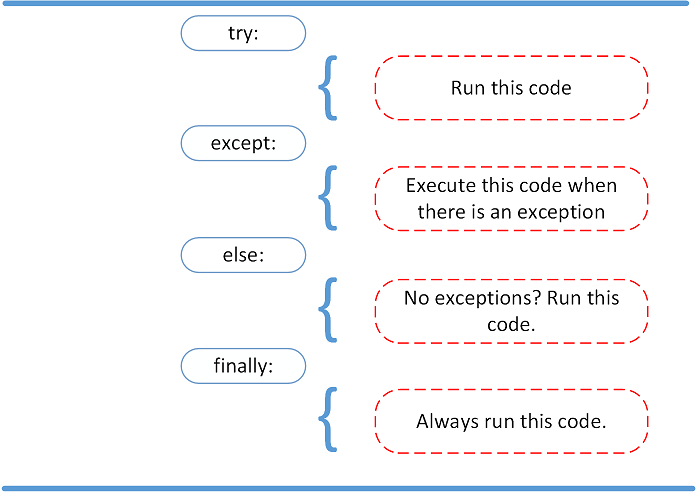

Some developers don't use the `else` part of the `try...except` block of statements because there isn't such a clause in the other older programming languages (aka C/C++, Java, etc). 

**Example: With `else` part**

In [ ]:
while True:
    try:
        result = 0
        x = input("Enter First Number or q to quit: ")
        
        # check for quiting condition
        if x.lower() == 'q':
            break
        
        y = input("Enter Second Number: ")
        
        result = float(x)/float(y)
    except ValueError:
        print('Can\'t convert to float')
    except ZeroDivisionError:
        print("Can't divide by 0")
    else:
        print(f'Result of the division: {result}\n')

**Example: Without `else` part**

In [ ]:
while True:
    try:
        result = 0
        x = input("Enter First Number or q to quit: ")
        
        # check for quiting condition
        if x.lower() == 'q':
            break
        
        y = input("Enter Second Number: ")
        
        result = float(x)/float(y)
    except ValueError:
        print('Can\'t convert to float')
    except ZeroDivisionError:
        print("Can't divide by 0")
    
    print(f'Result of the division: {result}\n')

The `finally` clause is mainly used to excute code that we know HAS to happen regardless of whether or not an exception is happened or not. This is mainly seen in codes use for **connecting** your program to an external resource such as a file, a server or a database. Because the connection needs to be closed to prevent file/data corruption or future connection failures when the previous connection isn't closed.

**Example: Subscribing to an internal/public Mqtt server**

In [ ]:
'''
This function is part of a class that does testing of an internal MQTT server.
'''
def subscribe(self, topic, QoS):
    # create function for callback
    def on_subscribe(client, userdata, mid, granted_qos):  
        print("in on subscribe callback result " + str(mid))
        if len(client.topic_ack) == 0:
            # print("All subs acknowledged")
            return
        for index, t in enumerate(client.topic_ack):
            if t[1] == mid:
                client.topic_ack.pop(index)  # remove it
                # print("removed from list")

    self.client.on_subscribe = on_subscribe
    mqtt.Client.topic_ack = []
    mqtt.Client.running_loop = True

    try:
        self.client.connect(self.broker02, self.port02)  # connect to broker
        self.client.loop_start()  # start the loop
        
        # this part is where the task begins --------------------------------------
        result = self.subscribe_topics(self.client, topic, QoS)
        time.sleep(0.5)

        if not self.check_topics(self.client):
            print("missing subscribe acknowledgements")
        # MQTT_ERR_SUCCESS, number 4 is a MQTT_ERR_NO_CONN
        assert result[0] == 0
        # -------------------------------------------------------------------------

    except Exception as e:
        print("\nerror on subscribing " + str(e))

    finally:
        # if we did not close the connection, it can stay up for however long the 
        # admistrator set the "stay connected" value as Mqtt uses a TCP connection
        # also depends on how the client sets up its connection settings
        self.client.loop_stop()  # stop the loop
        self.client.disconnect()

### Raising Exceptions

Used when we want to force an "error" to happen because certain type of events has happened. 

Example could be that the program is waiting for an acknowledgement from the server. You can store the start time of when the connection has been established then check with the current time to find out how much time has elasped. After an x amount of time, force an exception to alert the program that something has gone wrong and further actions needs to be taken.

**Example: Breaking a connection with the Mqtt server after 10 secs of no acknowledgement**

In [ ]:
'''
This function is part of a class that does testing of an internal MQTT server.
'''
def connect_disconnect(self, broker, port, expected):
    """
    Connects to a broker using the given port then disconnecting after some time.
    :param broker: The broker's location
    :param port: The broker's port to connect to
    :param expected: The expected result of the test case
    :return: return_code - 0 (success), 1 (failure)
    """
    def on_connect(client, userdata, flags, rc):
        # print('connection result:' + str(rc))
        mqtt.Client.connected_flag = True

    mqtt.Client.connected_flag = False
    self.client.on_connect = on_connect  # bind call back function

    try:
        self.start_time = time.time()
        elapsed_time = 0
        self.client.connect(broker, port)  # connect to broker
        self.client.loop_start()
        # A time out to make sure that it does wait for more than 10 seconds
        while elapsed_time < 10:
            if not self.client.connected_flag:  # wait in loop
                if elapsed_time > 10:
                    raise Exception("Time out! more than 10 seconds has passed")
                # need to wait for the broker to return the acknowledgement
                # which is triggered by the callback
                time.sleep(0.5)

                elapsed_time = time.time() - self.start_time
            else:
                break

        self.return_code = 0
    except Exception as e:
        self.logger.exception('error on connection: ' + type(e).__name__ + " " + str(e), exc_info=False)
        self.error_msg = "%s: %s" % (type(e).__name__, str(e))
        if expected == "fail":
            self.return_code = 0
        else:
            self.return_code = 1
    finally:
        self.client.loop_stop()
        self.client.disconnect()

    return self.return_code

---
## Classes & Objects

Scope is a very important concept with Classes because it determines the visbility of the variables when the program is working with it. When applied to classes, we always prefer "local" variables to global variables because global variables can contribute to data breaches while the program is running.

**What are the properties of Classes?**
* they are used to group a bunch of related functions together.
* they have a constructor defined by the `__init__()` function.
* they have a set of attributes upon which the functions work on with/without other external inputs.
* they are a template used to create objects of themselves.

**How is scope related to Classes?**<br>
The set of attributes (instance or class/static or local variables) determines how an object can be created differently despite being created from the same class.

**How is objects related to Classes?**<br>
From the book "Object-Oriented Analysis and Design" by G. Booch:
>  An object is an entity that has state, behaviour, and identity. The structure and behavior of similar objects are defined in their common class. The terms instance and object are interchangeable.

> The state of an object encompasses all of the (usually static) properties of the object plus the current (usually dynamic) values of each of these properties

From the quotes, an object state & identity refers to the instance/static variables defined in the class then given different data to produce different objects and the behaviour is defined by the instance/class methods of the class. That is why instance variables and methods require the `self` keyword because they "belong" to the individual object.

The confusing concepts is when things like class methods and static methods appear. 
* Class methods are generally used to create a instances of a class via external data or predefined constant data. It cannot modify object instance state but it can modify class variables via the `cls` argument.

* Static methods are independent, stateless methods that help a class carry out some utility function. It cannot modify object state (instance variables) nor class state (class variables). That means that the input and output of static functions are totally unrelated to the class its in.

**Example: Making Pizza**

In [ ]:
import math

class Pizza:
    def __init__(self, radius, ingredients):
        self.radius = radius
        self.ingredients = ingredients

    def __str__(self):
        return f'Pizza({self.radius}, ' + \
                f'{self.ingredients})'

    @classmethod
    def margherita(cls):
        return cls(4, ['mozzarella', 'tomatoes'])

    @classmethod
    def prosciutto(cls):
        return cls(6, ['mozzarella', 'tomatoes', 'ham'])
    
    def area(self):
        # using 'self' or classname to call static within a class is ok
        # because the method is accessible to the instance internally 
        # but it differs when called from outside the class.
        return self.circle_area(self.radius)

    @staticmethod
    def circle_area(r):
        return r ** 2 * math.pi

In [ ]:
p1 = Pizza.margherita()
print(f"An order of margherita {p1} has an area of {round(p1.area(), 2)} units squared")

print(f'\nThe area of a 6 units radius circle is {round(Pizza.circle_area(6),2)}')

---
## OOP

Ties together everything that we have learnt to implement real-world entities like inheritance, abstraction (information hiding), polymorphism, encapsulation in programming. The main aim of OOP is to bind together the data and the functions that operate on them so that no other part of the code can access this data except that function.

4 Main Concepts:
* **Encapsulation** - containing information in an object, exposing only selected information
* **Inheritance** - child classes inherit some variables and behaviours from parent class
* **Abstraction** - only exposing high level public methods for accessing an object
* **Polymorphism** - many methods can do the same task

### Encapsulation
Encapsulation means containing all important information inside an object, and only exposing selected information to the outside world. Attributes and behaviors are defined by code inside the class template.

Encapsulation requires defining some fields and/or methods as private and some as public.
* **Private** - methods and attributes, accessible from other methods of the same class. Private attributes requires the implementation of public accessor methods.
* **Public** - methods and attributes, accessible also from outside the class.

**Example: Encapsulation**

In [ ]:
class Employee:
 
    def __init__(self, name, emp_id):
        self.__name = name  # <- private variable
        self.emp_id = emp_id  # <- public variable
    
    # Accessor methods
    def get_name(self):
        return self.__name
    
    def set_name(self, name):
        self.__name = name

Encapsulation **adds security**. Attributes and methods can be set to private, so they can’t be accessed outside the class. To get information about data in an object, public methods & properties are used to access or update data. This in turns protection against common mistakes that can happen accidentally during development.

### Inheritance

Inheritance allows classes to inherit features of other classes. Put another way, parent classes extend attributes and behaviors to child classes. **Inheritance supports reusability.** For example, with inheritance, programs can create a generic parent class and then create more specific child classes as needed.

**Example: Inheritance**

In [ ]:
# base class
class Person():
    def __init__(self, name, address, salary, age):
        self.name = name
        self.address = address
        self.__salary = salary
        self.age = age
    
    def calculate_CPF(self, rate):
        return round((self.__salary * 12) * rate, 2)
    
    def get_salary(self):
        return self.__salary
    
    def print_info(self):
        print(f"Name: {self.name}")
        print(f"Age: {self.age}")
        print(f"Address: {self.address}")
        print(f"Salary per mth: {self.__salary}")

# child class
class Employee(Person):
    employee_cnt = 0
    def __init__(self, name, address, salary, age, company):
        # calling Parent method
        super().__init__(name, address, salary, age)
        self.company = company
        Employee.employee_cnt += 1
    
    def __get_CPF_rate(self):
        if self.age <= 55:
            return 0.37
        elif self.age > 55 and self.age <= 60:
            return 0.23
        elif self.age > 60 and self.age <= 65:
            return 0.165
        else:
            return 0.125
    
    def calculate_employee_CPF(self):
        return self.calculate_CPF(self.__get_CPF_rate())

Just using the 2 classes above, we can create multiple `Employee` or `Person` objects. The table below shows the methods inherited from the parent class.

| Object | Instantiated from Class | Parent Class | Available Methods |
|:---|:---:|:---:|:---:|
| John | Employee | Person | `calculate_CPF(), get_salary(), print_info(), calculate_employee_CPF(), __get_CPF_rate()` |
| Mary | Employee | Person | `calculate_CPF(), get_salary(), print_info(), calculate_employee_CPF(), __get_CPF_rate()` |
| Sally | Person | N.A. | `calculate_CPF(), get_salary(), print_info()` |

#### The `super()` function
With inheritance, we will always come across the `super()` method. This method allows the child class to access its **immediate parent's method** (basically 1 level up). Generally, the `super()` function is used to access the constructor of the immediate parent. Through the `super()` function, the child class is able to access the parent's private, protected and public methods but it's most often used to access the **private methods** because the protected and public methods have already been inherited and thus can be accessed using the `self` keyword. 

For **single type inheritance**, using the `super()` method or the `self` keyword to invoke parent methods produces the same results **BUT** for **multiple inheritance** it will produce different results (don't have to worry because it is out of the course scope).

### Abstraction
Abstraction means that the user interacts with only selected attributes and methods of an object. Abstraction uses simplified, high level tools, to access a complex object.

* Using simple things to represent complexity
* Hide complex details from user

**What are the properties of abstract classes?**
* must inherit the `ABC` class from the `abc` library
* abstract methods have no implementation and uses the `@abstractmethod` decorator
* cannot be instantiated
* abstract classes can be broken down into 2 main types:
   * **Abstract class** - can have a mix of implemented and empty methods. The child class has to implement the abstract methods.
   * **Interface class** - no implementation for all methods in this class.

## Polymorphism
Polymorphism means designing objects to share behaviors. Using inheritance, objects can override shared parent behaviors, with specific child behaviors. Polymorphism allows the same method to execute different behaviors in two ways: 
* **method overloading** - not supported in python. Use default parameters in the function definition to achieve similar results.
* **method overriding** - the child class providing a different implementation of a function having the same name and same number of arguments as that of its parent class.

Operator overloading is also heavily used to extend the operational meaning of predefined operators. This allows us to create custom classes with similar usability features compared built-in datatypes.

Duck Typing where the object's methods and properties are used to determine suitability rather than the actual type of the object.